In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mail-customer/Mall_Customers.csv


# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>*

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Dendogram to find optimal clusters](#3)
4. [Hierarchical Clustering Training](#4)
5. [Visualization](#5)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#2. Hierarchical Clustering 

##2.1 Dendogram
from scipy.cluster import hierarchy as sch

##2.2 Model
from sklearn.cluster import AgglomerativeClustering

<a id="2"></a>
# 2. Importing Dataset

[Go back to Index](#index)

In [3]:
df = pd.read_csv("/kaggle/input/mail-customer/Mall_Customers.csv")

In [4]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
df.iloc[:, [3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
df = pd.read_csv('/kaggle/input/mail-customer/Mall_Customers.csv')
X = df.iloc[:, [3,4]].values #Unsupervised learning, only X, also [3,4] is the random centroid we start with

<a id="3"></a>
# 3. Dendogram Method to find the optimal number of clusters

[Go back to Index](#index)

<a href="https://en.wikipedia.org/wiki/Ward%27s_method">Ward's method for Hierarchical Clustering</a>

<a href="https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python">Datacamp article on Hierarchical clustering</a>

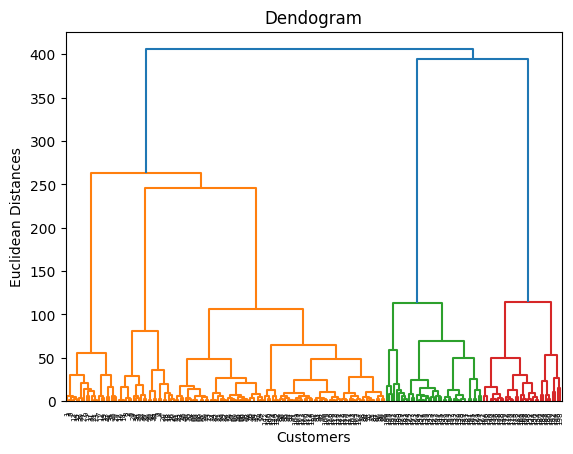

In [7]:
# clustering method:= ward
# minimizing variance inside clusters
dendogram = sch.dendrogram(sch.linkage(X, method="ward"))

plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

How to find the optimal number of clusters ? Simply find the largest euclidean distance possible when you scroll the horizontal line (you should stop when you reach the next horizontal line)

Here, it is 5

<a id="4"></a>
# 4. Training Hierarchical model on the dataset

[Go back to Index](#index)

In [8]:
hc = AgglomerativeClustering(n_clusters = 5, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<a id="5"></a>
# 5. Visualization

[Go back to Index](#index)

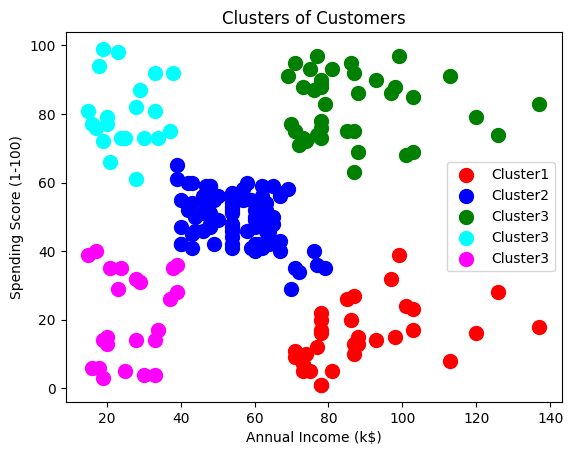

In [10]:
#Cluster 1
plt.scatter(
    X[y_hc == 0, 0],
    X[y_hc == 0, 1],
    s = 100, #size
    c = "red", #color
    label="Cluster1"
)

#Cluster 2
plt.scatter(
    X[y_hc == 1, 0],
    X[y_hc == 1, 1],
    s = 100, #size
    c = "blue", #color
    label="Cluster2"
)

#Cluster 3
plt.scatter(
    X[y_hc == 2, 0],
    X[y_hc == 2, 1],
    s = 100, #size
    c = "green", #color
    label="Cluster3"
)

#Cluster 4
plt.scatter(
    X[y_hc == 3, 0],
    X[y_hc == 3, 1],
    s = 100, #size
    c = "cyan", #color
    label="Cluster3"
)

#Cluster 5
plt.scatter(
    X[y_hc == 4, 0],
    X[y_hc == 4, 1],
    s = 100, #size
    c = "magenta", #color
    label="Cluster3"
)

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()